#### Nursultan Zhantileuov

####  MSc in DS, 1 course

####  Homework 1

In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.random as rd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score

# Taks: 1

#### 1. Predict house price of King county in the USA by modifying the linear regression sample code provided in Practice 2 at the class. Dataset and code will be available in the class file directory (15 points).
A. Linear Regression: Code in Practice 2

B. Dataset: Dataset in class file directory

C. The price should be predicted with features of bedrooms, yr_built, and grade.

D. Performance metric should include training loss.

E. You should predict the price with the following data (3 bedrooms, Year 1980, grade
8).

## Data pre-processing

In [2]:
data = pd.read_csv("kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
data = data[["price","bedrooms", "yr_built", "grade"]]
pd_data = data.copy()

In [4]:
def missing_value(data=None, columns=None):   # check for missing value in the data
    if data is not None and columns is None:
        total = data.isnull().sum().sort_values(ascending=False)
        percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
        return pd.concat([total, percent], axis=1, keys=["total", "percentage"])
    else:
        if columns is not None and type(columns) is list:
            total = data[columns].isnull().sum().sort_values(ascending=False)
            percent = (data[columns].isnull().sum()/data[columns].isnull().count()*100).sort_values(ascending = False)
            return pd.concat([total, percent], axis=1, keys=["total", "percentage"])
        
missing_value(data=pd_data)

,total,percentage
grade,0,0.0
yr_built,0,0.0
bedrooms,0,0.0
price,0,0.0


In [5]:
pd_data

,price,bedrooms,yr_built,grade
0,221900.0,3,1955,7
1,538000.0,3,1951,7
2,180000.0,2,1933,6
3,604000.0,4,1965,7
4,510000.0,3,1987,8
...,...,...,...,...
21592,360000.0,3,2009,8
21593,400000.0,4,2014,8
21594,402101.0,2,2009,7
21595,400000.0,3,2004,8


In [6]:
def explore_corr(data=None, figsize=(10,10)):  #explore correlation relative one column
    fig, ax = plt.subplots(figsize=figsize);
    return sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax);

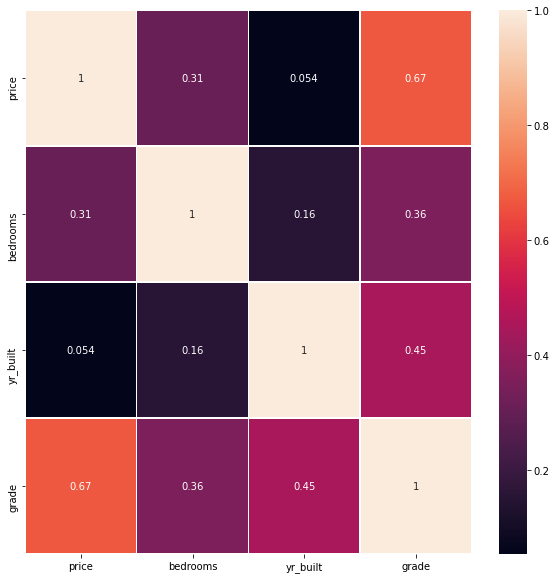

In [7]:
explore_corr(data=pd_data);

### normalization od data

In [8]:
columns_norm = pd_data.iloc[:,1:]

min_max_scaler = MinMaxScaler()
features = min_max_scaler.fit_transform(columns_norm)

X = features[:,:3]
Y = data["price"]

In [9]:
# Linear Regression Model
class LinearRegression:
    
    def __init__(self, x, w, y, eta):
        self.eta = eta 
        self.inputs  = x   
        self.weights = w               
        self.target  = y
        self.output  = np.zeros(self.target.shape)  # array of lenght target = len(target)

    def forward_proc(self):
        # forward processing of inputs and weights
        self.output = np.dot(self.weights, self.inputs.T) 

    def backprop(self):
        # backward processing of appling the chain rule to find derivative of the mean square error function with respect to weights
        dw = (self.output - self.target) * self.inputs

        # update the weights with the derivative of the loss function
        self.weights -= self.eta * dw

    def predict(self, x):
        # predict the output for a given input x
        return (np.dot(self.weights, x.T))
        
    def calculate_error(self):
        # calculate error
        error = self.target - self.output
        return abs(error)

In [10]:
features = X.shape[1] #  features = 3
weights = np.random.randint(1, features) 

In [11]:
learning_rate = 0.5
epochs = 1000

In [13]:
for epoch in range(epochs):
    
    rd.shuffle(X)  # shuffle the input data
    
    for index in range(len(X)):
        
        model = LinearRegression(X[index], weights, Y[index], learning_rate)
        model.forward_proc() # forward_processing
        model.backprop()     # backward_processing
        weights = model.weights
        
    if (epoch % 100) == 0:
        loss = model.calculate_error()
        print(f"Loss: {loss}")
            
final_weights = weights
final_loss = loss

print(f"final weights{final_weights}")
print(f"final loss {loss}")


Loss: 22613.74904811429
Loss: 17685.997472882096
Loss: 22322.832925810828
Loss: 72068.47176254974
Loss: 198910.82310924155
Loss: 46367.49693515641
Loss: 49112.65316168731
Loss: 72473.09238052461
Loss: 50523.729565151094
Loss: 78381.38657494239
final weights[1193888.73018149  -68392.56686129  750086.698262  ]
final loss 78381.38657494239


In [16]:
check_data = np.array([3, 1980, 8]).reshape(1, -1)
check_data = min_max_scaler.transform(check_data) # normalization of data

In [17]:
predict_price = model.predict(check_data)
print(predict_price[0])

402083.95695079543


# Task: 2

Predicting the survival of Titanic passengers by modifying the logistic regression sample code provided in Practice 2 at the class. You are going to use the famous Titanic dataset. Both the sample code and dataset are available in the class file directory. This is a binary classification problem: Based on passengers’ stats, predict whether a passenger will survive from the aground Titan or not. The dataset should be split into training data and test data with 80:20 ratio (15 points)

A. Logistic Regression: Code in Practice 2
    
B. Dataset: Dataset in class file directory
    
C. The classification, i.e., survival, is based on sex, age and economic status (Pclass) of
the dataset. You should extend the code provided in Practice 2 for classification using
these features.

D. Performance metrics should include the confusion matrix, accuracy score,
classification report. You can measure the performance in both training and test data, but submit the performance metrics in test data only.

### LogisticRegression

In [18]:
def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

def sigmoid_derivative(x):
    return x * (1.0 - x)

# Logistic Regression Model
class LogisticRegression:
    
    def __init__(self, x, w, y,lr):
        self.lr = lr
        self.inputs  = x
        self.weights = w               
        self.target  = y
        self.output  = np.zeros(self.target.shape)

    def forward_proc(self):
       # forward processing of inputs and weights using sigmoid activation function 
        self.output = sigmoid(np.dot(self.weights, self.inputs.T))

    def backprop(self):
        # backward processing of appling the chain rule to find derivative of the cross-entropy losss w.r.t weights
        dw = (self.output - self.target) * self.inputs # same formular for both linear and logistic regression

        # update the weights with the derivative of the loss function
        self.weights -= self.lr * dw

    def predict(self, x):
        # predict the output for a given input x
        return (sigmoid(np.dot(self.weights, x.T)))
        
    def calculate_error(self):
        # calculate error
        error = -self.target * math.log(self.output) - (1-self.target) * math.log(1-self.output)
        return abs(error)

In [19]:
data = pd.read_csv("titanic_data.csv")

In [20]:
missing_value(data)

,total,percentage
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


In [21]:
data.dropna(inplace=True)
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [23]:
data = data.replace({"female":0, "male":1})

In [24]:
Y = data["Survived"]
X = data[["Sex", "Age", "Pclass"]]


In [25]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)
# The dataset should be split into trainging data and test data with ratio 80:20

In [26]:
features = X.shape[1] # 3
weights = rd.rand(1, features)
weights

array([[0.29691145, 0.74827359, 0.82890352]])

In [27]:
lr = 0.7       # learning rate
epochs = 10000   # Iterate

In [28]:
for epoch in range(epochs):
    
    rd.shuffle(X_train)  # shuffle the input data
    
    for index in range(len(X_train)):
        
        model = LogisticRegression(X_train[index], weights, Y_train.values[index], learning_rate)
        model.forward_proc() # forward_processing
        model.backprop()     # backward_processing
        weights = model.weights
        
    if (epoch % 1000) == 0:
        loss = model.calculate_error()
        print(f"Loss: {loss}")
            
final_weights = weights
final_loss = loss

print("Adjusted Weights:", model.weights)

Loss: 1.9283316144202138
Loss: 0.6172808589255477
Loss: 0.5103383307510152
Loss: 0.666332337066468
Loss: 0.34979931521086105
Loss: 0.3929978832445174
Loss: 0.8763844301846109
Loss: 1.2790103564909325
Loss: 0.8352687805513159
Loss: 0.7339403507063383
Adjusted Weights: [[ 0.59906037 -0.09395271 -1.02872569]]


In [29]:
predicted = model.predict(X_test)[0]

In [30]:
predict_out = []
for prediction in predicted:
    if prediction >= 0.5:
        predict_out.append(1)
    else:
        predict_out.append(0)

In [31]:
results = confusion_matrix(Y_test, predict_out)
print("Confusion_matrix :")
print(results)
print("Classification Report")
print(classification_report(Y_test, predict_out))
print(accuracy_score(Y_test, predict_out))

Confusion_matrix :
[[ 5  6]
 [16 10]]
Classification Report
              precision    recall  f1-score   support

           0       0.24      0.45      0.31        11
           1       0.62      0.38      0.48        26

    accuracy                           0.41        37
   macro avg       0.43      0.42      0.39        37
weighted avg       0.51      0.41      0.43        37

0.40540540540540543


# Task: 3

In this problem, you will implement multiclass-classification using Scikit library. The dataset is Iris dataset. Here, the dataset should be split into training data and test data with 70:30 ratio. You will implement multi-class classification using logistic regression, Naïve Bayes classifier, and Gaussian RBF of SVM. You will compare the performances of these classifiers in terms of accuracy and confusion matrix, recall, precision and F1-score (30 points).

A. Dataset: Iris dataset of Practice 1

B. Logistic Regression (LogistRegression_P3.py)

C. SVM with one-vs-all approach (SVM_P3.py)

D. Naïve Bayes (NB_P3.py)

E. Performance metrics: accuracy, confusion matrix, recall, precision and F1-score
    
F. Comparative performance evaluation of logistic regression, SVM and NB for multi-
class classification

In [32]:
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB

In [33]:
iris = datasets.load_iris()

In [34]:
scaler = StandardScaler()
X = scaler.fit_transform(iris["data"])
y = iris["target"]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Caussian Model

In [36]:
GaussianModel = GaussianNB() #training a Naive Bayes classifier
GaussianModel.fit(X_train, y_train)

GaussianNB()

In [37]:
gaussian_predict = GaussianModel.predict(X_test)

#Creating a canfusion matrix
conf_matrix = confusion_matrix(y_test, gaussian_predict) 

gaussian_recall = recall_score(y_test, gaussian_predict, average="weighted")
print(f"Weighted Gausian Recall Score: {gaussian_recall:.2f}")

gaussian_precision = precision_score(y_test, gaussian_predict, average="weighted")
print(f"Weighted Gausian precision Score: {gaussian_precision:.2f}")

gaussian_f1_score = f1_score(y_test, gaussian_predict, average="weighted")
print(f"Weighted Gausian F1-Score: {gaussian_f1_score:.2f}")

gaussian_accuracy = GaussianModel.score(X_test, y_test)
print(f"Weighted Gaussian Accuracy: {gaussian_accuracy:.2f}")
print(conf_matrix)

Weighted Gausian Recall Score: 0.93
Weighted Gausian precision Score: 0.94
Weighted Gausian F1-Score: 0.93
Weighted Gaussian Accuracy: 0.93
[[14  0  0]
 [ 0 16  2]
 [ 0  1 12]]


### SVC model

In [38]:
from sklearn.svm import SVC
rbf = SVC(kernel="rbf", gamma=0.5, C=1.0)
rbf.fit(X_train, y_train)

SVC(gamma=0.5)

In [39]:
rbf_predict = rbf.predict(X_test)

In [40]:
#Creating a canfusion matrix
rbf_canf_matrix =  confusion_matrix(y_test, rbf_predict) 

rbf_recall = recall_score(y_test, rbf_predict, average="weighted")
print(f"Weighted SVC Recall Score: {rbf_recall:.2f}")

rbf_precision = precision_score(y_test, rbf_predict, average="weighted")
print(f"Weighted SVC precision Score: {rbf_precision:.2f}")

rbf_f1_score = f1_score(y_test, rbf_predict, average="weighted")
print(f"Weighted SVC F1-Score: {rbf_f1_score:.2f}")

# Accuracy on X_test
rbf_accuracy = rbf.score(X_test, y_test)
print(f"Wighted SVC Accuracy: {rbf_accuracy:.2f}")
print(rbf_canf_matrix)

Weighted SVC Recall Score: 0.96
Weighted SVC precision Score: 0.96
Weighted SVC F1-Score: 0.96
Wighted SVC Accuracy: 0.96
[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


### Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
# Traing
logistic_reg = LogisticRegression(C=1e5,)
logistic_reg.fit(X_train, y_train)

LogisticRegression(C=100000.0)

In [43]:
log_predict = logistic_reg.predict(X_test)

In [44]:
#Creating a canfusion matrix
log_canf_matrix =  confusion_matrix(y_test, log_predict) 

log_recall = recall_score(y_test, log_predict, average="weighted")
print(f"Weighted Logistic Recall Score: {log_recall}")

rog_precision = precision_score(y_test, log_predict, average="weighted")
print(f"Weighted Logistic precision Score: {rog_precision}")

log_f1_score = f1_score(y_test, log_predict, average="weighted")
print(f"Weighted Logistic F1-Score: {log_f1_score}")

log_accuracy = logistic_reg.score(X_test, y_test)
print(f"Weighted Logistic Accuracy: {log_accuracy}")

print(log_canf_matrix)

Weighted Logistic Recall Score: 1.0
Weighted Logistic precision Score: 1.0
Weighted Logistic F1-Score: 1.0
Weighted Logistic Accuracy: 1.0
[[14  0  0]
 [ 0 18  0]
 [ 0  0 13]]


### Model Comparisions

In [45]:
conteiner = {"Gaussian":[gaussian_accuracy, gaussian_recall, gaussian_precision, gaussian_f1_score],
            "SVC": [rbf_accuracy, rbf_recall, rbf_precision, rbf_f1_score],
            "Logistic Regression": [log_accuracy,log_recall, rog_precision, log_f1_score]}
x_value = ["Accuracy", "Recall", "Precision", "F1-Score"]

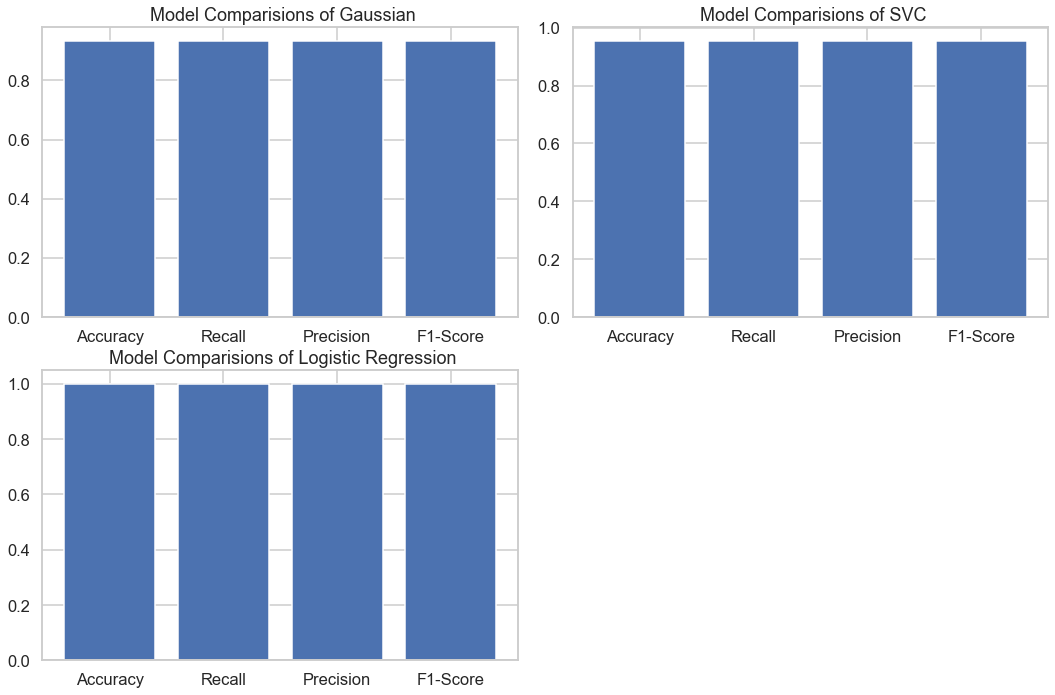

In [46]:
sns.set(style="whitegrid", context="talk")
fig, axs = plt.subplots(2,2, figsize=(15,10))
fig.delaxes(axs[1,1])
index = 0
for key in conteiner:
    plt.subplot(2,2, index+1)
    plt.tight_layout()
    plt.bar(x_value, conteiner[key])
    plt.title(f" Model Comparisions of {key}")
    index = index + 1